## Serial Crystallography Introduction

<img src="ijms-20-01094-g001.png" width="700" align="left"/>  
 

 
(c) Nam et al.  Int. J. Mol. Sci. 2019, 20(5), 1094; https://doi.org/10.3390/ijms20051094 

## Sample choice

[3WUL](https://www.rcsb.org/structure/3WUL) is a protein structure in PDB (Sugahara et al, 2016, [10.1038/nmeth.3172](https://dx.doi.org/10.1038/nmeth.3172)).
The protein is hen's egg-white lysozyme (HEWL), a small enzyme commonly used as a test case for X-ray crystallography.

<img src="3wul.pdb1-500.jpg" width="300" align="left"/>

## Detector

The AGIPD detector, which is already in use at the SPB experiment, consists of 16 modules of 512×128 pixels each. Each module is further divided into 8 ASICs (application-specific integrated circuit).

<img src="AGIPD.png" width="300" align="left"/> <img src="agipd_geometry_14_1.png" width="420" align="right"/> 

<div style="clear: both"><small>Photo © European XFEL</small></div>

## Simulation Demonstration

In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np

from SimEx import *

import matplotlib.colors as colors

initializing ocelot...



## Data path setup

In [2]:
data_path = './diffr'

## Clean up previous diffraction run

In [3]:
dirs_to_remove=['diffr']
files_to_remove=['diffr.h5']

for d in dirs_to_remove:
    if os.path.isdir(d):
        shutil.rmtree(d)
for f in files_to_remove:
    if os.path.isfile(f):
        os.remove(f)

## Set up X-ray Beam Parameters

In [4]:
beamParam = PhotonBeamParameters(
    photon_energy = 4972.0 * electronvolt,  # photon energy in eV
    beam_diameter_fwhm=130e-9 * meter,      # focus diameter in m
    pulse_energy=45e-3 * joule,             # pulse energy in J
    photon_energy_relative_bandwidth=0.003, # relative bandwidth dE/E
    divergence=0.0 * radian,                # Beam divergence in rad
    photon_energy_spectrum_type='tophat',   # Spectrum type. Acceptable values are "tophat", "SASE", and "twocolor")
    )

## Detector Setting

In [5]:
from extra_geom import AGIPD_1MGeometry
geom = AGIPD_1MGeometry.from_quad_positions(quad_pos=[
    (-525, 625),
    (-550, -10),
    (520, -160),
    (542.5, 475),
])

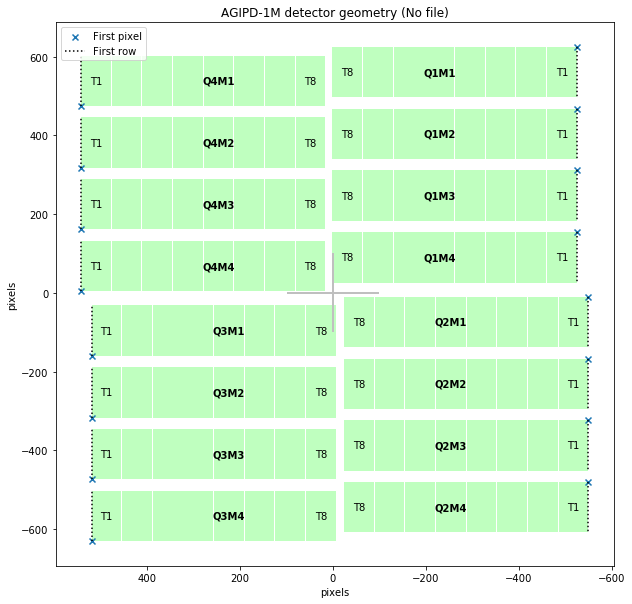

In [6]:
geom.inspect()

In [7]:
geom.write_crystfel_geom('agipd_simple_2d.geom', dims=('frame', 'ss', 'fs'),  adu_per_ev=1.0, clen=0.13, photon_energy=4972)

## Diffractor Settings

In [8]:
diffParam = CrystFELPhotonDiffractorParameters(
        sample='3WUL.pdb',                    # Looks up pdb file in cwd, if not found, queries from RCSB pdb mirror.
        uniform_rotation=True,                # Apply random rotation
        number_of_diffraction_patterns=2,     #
        powder=False,                         # Set to True to create a virtual powder diffraction pattern (unested)
        intensities_file=None,                # File that contains reflection intensities. If set to none, use uniform intensity distribution
        crystal_size_range=[1e-7,1e-7],       # Range ([min,max]) in units of metres of crystal size.
        poissonize=False,                     # Set to True to add Poisson noise.
        number_of_background_photons=0,       # Change number to add uniformly distributed background photons.
        suppress_fringes=False,               # Set to True to suppress side maxima between reflection peaks.
        beam_parameters=beamParam,                 # Beam parameters object from above
        detector_geometry='agipd_simple_2d_edit.geom',      # External file that contains the detector geometry in CrystFEL notation.
        )

In [9]:
diffractor = CrystFELPhotonDiffractor(parameters=diffParam,
                                     output_path=data_path)

In [10]:
diffractor._run_geom()
diffractor.saveH5_geom()

Renaming diffr_out-1.h5 to diffr_out_0000001.h5.
Renaming diffr_out-2.h5 to diffr_out_0000002.h5.
Linking all patterns into /gpfs/exfel/data/user/juncheng/crystalProject/src/controller/panoscDEMO/diffr.h5.


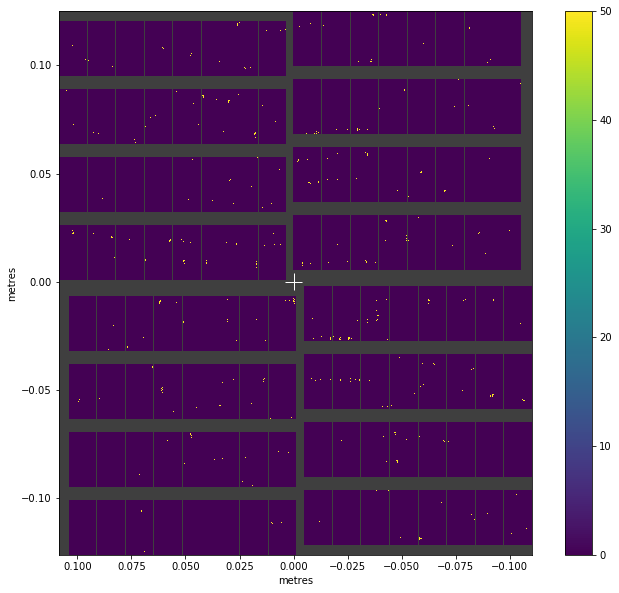

In [12]:
from extra_geom import AGIPD_1MGeometry
geom = AGIPD_1MGeometry.from_crystfel_geom('agipd_simple_2d_edit.geom')
data_file = data_path+'.h5'
data_f = h5py.File(data_file, "r")
frame = data_f['data/0000001/data'][:].reshape(16, 512, 128)
fig, ax = plt.subplots(figsize=(12, 10))
geom.plot_data_fast(frame, axis_units='m', ax=ax, vmax=50);